# Double Q-learning
Q-learning sometimes has pool results under stochastic environments. Hasselt[2011] proposed Double Q-learning to overcome this problem.I implement and evaluate Sarsa, Q-learning and Double Q-learning in a standard and new randomized CliffWalking which gaussian distribution is applied to the rewards.
## Randomized CliffWalking
The standard CliffWalking is a stable environment and the reward of each episode tends to be converge quickly.I propose a randomized CliffWalking which provides a stochastic environment resulting from its gaussian distribution rewards, and Sarsa, Q-learning and Doubel Q-learning are tested.

In [80]:
#randomized Cliff Walking
#Gaussian distribution is applied to Rewards
%matplotlib inline
import numpy as np
class CliffWalking:
    def __init__(self, width = 12, height = 4, variance = 0.1):
        self.width = width
        self.height = height
        self.x = 0
        self.y = 0
        self.variance = variance
    def resetPosition(self):
        self.x = 0
        self.y = 0
    def getReward(self):
        rew = -1
        if self.y == 0 and self.x == self.width - 1:
            if self.variance > 0:
                rew = np.random.normal(100, 100 * self.variance)
            else:
                rew = 100
        elif self.y == 0 and self.x > 0 and self.x < self.width - 1:
            #cliff
            self.resetPosition()
            if self.variance > 0:
                rew = np.random.normal(-100, 100 * self.variance)
            else:
                rew = -100
        else:
            if self.variance > 0:
                rew = np.random.normal(-1, self.variance)
            else:
                rew = -1
        return rew
    def move(self, moveType):
        if moveType == 'u':
            if self.y < self.height - 1:
                self.y += 1
        elif moveType == 'd':
            if self.y > 0:
                self.y -= 1
        elif moveType == 'r':
            if self.x < self.width - 1:
                self.x += 1
        elif moveType == 'l':
            if self.x > 0:
                self.x -= 1
        return self.getReward()
    def isEnd(self):
        return self.x > 0 and self.y == 0
    def getPosition(self):
        return [self.x, self.y]

## Q-learning

In [81]:
actions = ['u', 'd', 'r', 'l']
epsilon = 0.1
#Q Learning
def qLearning(cw, width, height, avgR, iterator, max_iter):
    q = np.zeros((width, height, 4))
    G = 0.0
    i = 0
    while not cw.isEnd():
        s0 = cw.getPosition()
        a = q[s0[0], s0[1]].argmax()
        if np.random.random() < epsilon:
            a = np.random.choice(range(4))
        r = cw.move(actions[a])
        G += r
        i += 1
        if i <= max_iter:
            avgR[i] = G / i
        s1 = cw.getPosition()
        q[s0[0], s0[1], a] +=  0.1 * (r + 0.8 * q[s1[0], s1[1]].max() - q[s0[0], s0[1], a])
    iterator.append(i)

## Double Q-learning

In [82]:
actions = ['u', 'd', 'r', 'l']
epsilon = 0.1
#Q Learning
def dqLearning(cw, width, height, avgR, iterator, max_iter):
    q1 = np.zeros((width, height, 4))
    q2 = np.zeros((width, height, 4))
    G = 0.0
    i = 0
    while not cw.isEnd():
        s0 = cw.getPosition()
        a = np.argmax(q1[s0[0], s0[1]] + q2[s0[0], s0[1]])
        if np.random.random() < epsilon:
            a = np.random.choice(range(4))
        r = cw.move(actions[a])
        G += r
        i += 1
        if i <= max_iter:
            avgR[i] = G / i
        s1 = cw.getPosition()
        if np.random.random() < 0.5:
            q1[s0[0], s0[1], a] +=  0.1 * (r + 0.8 * q2[s1[0], s1[1], q1[s1[0], s1[1]].argmax()] - q1[s0[0], s0[1], a])
        else:
            q2[s0[0], s0[1], a] +=  0.1 * (r + 0.8 * q1[s1[0], s1[1], q2[s1[0], s1[1]].argmax()] - q2[s0[0], s0[1], a])
    iterator.append(i)

## Sarsa

In [83]:
actions = ['u', 'd', 'r', 'l']
epsilon = 0.1
#Sarsa
def Sarsa(cw, width, height, avgR, iterator, max_iter):
    q = np.zeros((width, height, 4))
    G = 0.0
    i = 0
    while not cw.isEnd():
        s0 = cw.getPosition()
        a = q[s0[0], s0[1]].argmax()
        if np.random.random() < epsilon:
            a = np.random.choice(range(4))
        r = cw.move(actions[a])
        G += r
        i += 1
        if i <= max_iter:
            avgR[i] = G / i
        s1 = cw.getPosition()
        a1 = q[s1[0], s1[1]].argmax()
        if np.random.random() < epsilon:
            a1 = np.random.choice(range(4))
        q[s0[0], s0[1], a] +=  0.1 * (r + 0.8 * q[s1[0], s1[1], a1] - q[s0[0], s0[1], a])
    iterator.append(i)

## Sarsa, Q-learning and Double Q-learning on CliffWalking

Average iteration of Q-learning: 850.37
Average iteration of Double Q-learning: 865.028


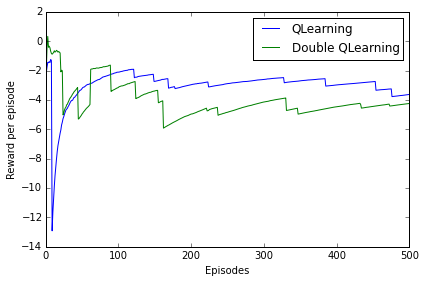

In [90]:
import matplotlib.pyplot as plt
#initialize CliffWalking
cw = CliffWalking(variance = 1)
ite1 = []
avgR1 = [[0.0]*500] * 500
ite2 = []
avgR2 = [[0.0]*500] * 500
for i in range(500):
    cw.resetPosition()
    qLearning(cw, 12, 4, avgR1[i], ite1, 499)
    cw.resetPosition()
    dqLearning(cw, 12, 4, avgR2[i], ite2, 499)
plt.plot(np.mean(np.asarray(avgR1, dtype=np.float32), axis=0), label = 'QLearning')
print "Average iteration of Q-learning: " + str(np.mean(ite1))
plt.plot(np.mean(np.asarray(avgR2, dtype=np.float32), axis=0), label = 'Double QLearning')
print "Average iteration of Double Q-learning: " + str(np.mean(ite2))
plt.ylabel('Reward per episode')
plt.xlabel('Episodes')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Sarsa, Q-learning and Double Q-learning on randomized CliffWalking

Variance:0
Average iteration of Q-learning: 749.19
Average iteration of Double Q-learning: 748.55
Average iteration of Sarsa: 784.44
Variance:0.1
Average iteration of Q-learning: 797.93
Average iteration of Double Q-learning: 728.63
Average iteration of Sarsa: 792.76
Variance:0.5
Average iteration of Q-learning: 774.75
Average iteration of Double Q-learning: 830.98
Average iteration of Sarsa: 776.27
Variance:1
Average iteration of Q-learning: 885.33
Average iteration of Double Q-learning: 789.86
Average iteration of Sarsa: 974.77
Variance:5
Average iteration of Q-learning: 2758.69
Average iteration of Double Q-learning: 1481.93
Average iteration of Sarsa: 2374.6
Variance:10
Average iteration of Q-learning: 4360.79
Average iteration of Double Q-learning: 1938.23
Average iteration of Sarsa: 3239.43


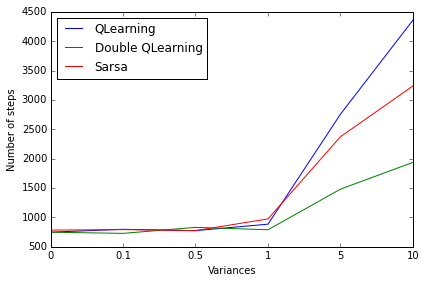

In [92]:
#initialize Random CliffWalking
variances = [0, 0.1, 0.5, 1, 5, 10]
ite1_a = []
ite2_a = []
ite3_a = []
for variance in variances:
    cw = CliffWalking(variance = variance)
    ite1 = []
    avgR1 = [[0.0]*200] * 100
    ite2 = []
    avgR2 = [[0.0]*200] * 100
    ite3 = []
    avgR3 = [[0.0]*200] * 100
    for i in range(100):
        cw.resetPosition()
        qLearning(cw, 12, 4, avgR1[i], ite1, 199)
        cw.resetPosition()
        dqLearning(cw, 12, 4, avgR2[i], ite2, 199)
        cw.resetPosition()
        Sarsa(cw, 12, 4, avgR3[i], ite3, 199)
    ite1_a.append(np.mean(ite1))
    ite2_a.append(np.mean(ite2))
    ite3_a.append(np.mean(ite3))
    print "Variance:" + str(variance)
    print "Average iteration of Q-learning: " + str(np.mean(ite1))
    print "Average iteration of Double Q-learning: " + str(np.mean(ite2))
    print "Average iteration of Sarsa: " + str(np.mean(ite3))
plt.plot(ite1_a, label = 'QLearning')
plt.plot(ite2_a, label = 'Double QLearning')
plt.plot(ite3_a, label = 'Sarsa')
plt.xticks(range(6), variances, rotation=0)  
plt.ylabel('Number of steps')
plt.xlabel('Variances')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Discussion
We create a randomized CliffWalking environment and compare these methods based on different vairance ratio. From the experiments,Double Q-learning is less sensitive to the variances (the higer variance the more uncertain environment) and needs much fewer steps to reach the goal when the variance is big.